## Seldon Model Zoo

Examples of various model artefact types from various frameworks running under Seldon Core V2.

 * SKlearn
 * Tensorflow
 * XGBoost
 * ONNX
 * Lightgbm
 * MLFlow
 * PyTorch

Python requirements in `model-zoo-requirements.txt`

### SKLearn Iris Classification Model

The training code for this model can be found at `./scripts/models/iris`

In [1]:
!cat ./models/sklearn-iris-gs.yaml

apiVersion: mlops.seldon.io/v1alpha1
kind: Model
metadata:
  name: iris
spec:
  storageUri: "gs://seldon-models/scv2/samples/mlserver_1.2.4/iris-sklearn"
  requirements:
  - sklearn
  memory: 100Ki


In [2]:
!seldon model load -f ./models/sklearn-iris-gs.yaml

{}


In [3]:
!seldon model status iris -w ModelAvailable | jq -M .

{}


In [4]:
!seldon model infer iris \
  '{"inputs": [{"name": "predict", "shape": [1, 4], "datatype": "FP32", "data": [[1, 2, 3, 4]]}]}' 

{
	"model_name": "iris_1",
	"model_version": "1",
	"id": "09263298-ca66-49c5-acb9-0ca75b06f825",
	"parameters": {},
	"outputs": [
		{
			"name": "predict",
			"shape": [
				1,
				1
			],
			"datatype": "INT64",
			"data": [
				2
			]
		}
	]
}


In [5]:
!seldon model unload iris

{}


### Tensorflow CIFAR10 Image Classification Model


In [6]:
import requests
import json
from typing import Dict, List
import numpy as np
import os
import tensorflow as tf
from alibi_detect.utils.perturbation import apply_mask
from alibi_detect.datasets import fetch_cifar10c
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()

2023-03-09 19:43:43.637892: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-09 19:43:43.637906: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
train, test = tf.keras.datasets.cifar10.load_data()
X_train, y_train = train
X_test, y_test = test

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
classes = (
    "plane",
    "car",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [8]:
reqJson = json.loads('{"inputs":[{"name":"input_1","data":[],"datatype":"FP32","shape":[]}]}')
url = "http://0.0.0.0:9000/v2/models/model/infer"

def infer(resourceName: str, idx: int):
    rows = X_train[idx:idx+1]
    show(rows[0])
    reqJson["inputs"][0]["data"] = rows.flatten().tolist()
    reqJson["inputs"][0]["shape"] = [1, 32, 32, 3]
    headers = {"Content-Type": "application/json", "seldon-model":resourceName}
    response_raw = requests.post(url, json=reqJson, headers=headers)
    probs = np.array(response_raw.json()["outputs"][0]["data"])
    print(classes[probs.argmax(axis=0)])
    

def show(X):
    plt.imshow(X.reshape(32, 32, 3))
    plt.axis("off")
    plt.show()


In [9]:
!cat ./models/cifar10-no-config.yaml

apiVersion: mlops.seldon.io/v1alpha1
kind: Model
metadata:
  name: cifar10
spec:
  storageUri: "gs://seldon-models/scv2/samples/tensorflow/cifar10"
  requirements:
  - tensorflow


In [10]:
!seldon model load -f ./models/cifar10-no-config.yaml

{}


In [11]:
!seldon model status cifar10 -w ModelAvailable | jq -M .

{}


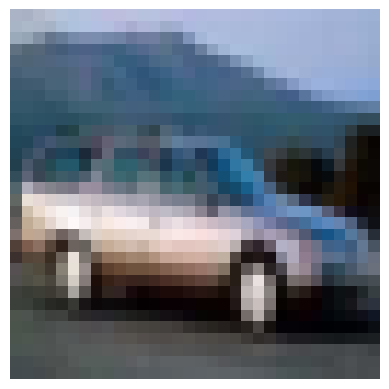

car


In [12]:
infer("cifar10",4)

In [13]:
!seldon model unload cifar10

{}


### XGBoost Model

The training code for this model can be found at `./scripts/models/income-xgb`

In [14]:
!cat ./models/income-xgb.yaml

apiVersion: mlops.seldon.io/v1alpha1
kind: Model
metadata:
  name: income-xgb
spec:
  storageUri: "gs://seldon-models/scv2/samples/mlserver_1.2.4/income-xgb"
  requirements:
  - xgboost


In [15]:
!seldon model load -f ./models/income-xgb.yaml

{}


In [16]:
!seldon model status income-xgb -w ModelAvailable | jq -M .

{}


In [17]:
!seldon model infer income-xgb \
  '{ "parameters": {"content_type": "pd"}, "inputs": [{"name": "Age", "shape": [1, 1], "datatype": "INT64", "data": [47]},{"name": "Workclass", "shape": [1, 1], "datatype": "INT64", "data": [4]},{"name": "Education", "shape": [1, 1], "datatype": "INT64", "data": [1]},{"name": "Marital Status", "shape": [1, 1], "datatype": "INT64", "data": [1]},{"name": "Occupation", "shape": [1, 1], "datatype": "INT64", "data": [1]},{"name": "Relationship", "shape": [1, 1], "datatype": "INT64", "data": [3]},{"name": "Race", "shape": [1, 1], "datatype": "INT64", "data": [4]},{"name": "Sex", "shape": [1, 1], "datatype": "INT64", "data": [1]},{"name": "Capital Gain", "shape": [1, 1], "datatype": "INT64", "data": [0]},{"name": "Capital Loss", "shape": [1, 1], "datatype": "INT64", "data": [0]},{"name": "Hours per week", "shape": [1, 1], "datatype": "INT64", "data": [40]},{"name": "Country", "shape": [1, 1], "datatype": "INT64", "data": [9]}]}' 

{
	"model_name": "income-xgb_1",
	"model_version": "1",
	"id": "e30c3b44-fa14-4e5f-88f5-d6f4d287da20",
	"parameters": {},
	"outputs": [
		{
			"name": "predict",
			"shape": [
				1,
				1
			],
			"datatype": "FP32",
			"data": [
				-1.8380107879638672
			]
		}
	]
}


In [18]:
!seldon model unload income-xgb

{}


## ONNX MNIST Model

This model is a pretrained model as defined in `./scripts/models/Makefile` target `mnist-onnx`

In [1]:
import matplotlib.pyplot as plt
import json
import requests
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
training_data = MNIST(
    root=".",
    download=True,
    train=False,
    transform = transforms.Compose([
              transforms.ToTensor()
          ])
)


In [2]:
reqJson = json.loads('{"inputs":[{"name":"Input3","data":[],"datatype":"FP32","shape":[]}]}')
url = "http://0.0.0.0:9000/v2/models/model/infer"
dl = DataLoader(training_data, batch_size=1, shuffle=False)
dlIter = iter(dl)

def infer_mnist():
    x, y = next(dlIter)
    data = x.cpu().numpy()
    reqJson["inputs"][0]["data"] = data.flatten().tolist()
    reqJson["inputs"][0]["shape"] = [1, 1, 28, 28]
    headers = {"Content-Type": "application/json", "seldon-model":"mnist-onnx"}
    response_raw = requests.post(url, json=reqJson, headers=headers)
    show_mnist(x)
    probs = np.array(response_raw.json()["outputs"][0]["data"])
    print(probs.argmax(axis=0))
    

def show_mnist(X):
    plt.imshow(X.reshape(28, 28))
    plt.axis("off")
    plt.show()

In [3]:
!cat ./models/mnist-onnx.yaml

apiVersion: mlops.seldon.io/v1alpha1
kind: Model
metadata:
  name: mnist-onnx
spec:
  storageUri: "gs://seldon-models/scv2/samples/triton_23-03/mnist-onnx"
  requirements:
  - onnx


In [4]:
!seldon model load -f ./models/mnist-onnx.yaml

{}


In [5]:
!seldon model status mnist-onnx -w ModelAvailable | jq -M .

{}


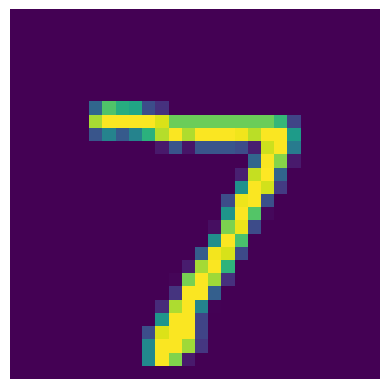

7


In [6]:
infer_mnist()

In [7]:
!seldon model unload mnist-onnx

{}


### LightGBM Model

The training code for this model can be found at `./scripts/models/income-lgb`

In [31]:
!cat ./models/income-lgb.yaml

apiVersion: mlops.seldon.io/v1alpha1
kind: Model
metadata:
  name: income-lgb
spec:
  storageUri: "gs://seldon-models/scv2/samples/mlserver_1.2.4/income-lgb"
  requirements:
  - lightgbm


In [32]:
!seldon model load -f ./models/income-lgb.yaml

{}


In [33]:
!seldon model status income-lgb -w ModelAvailable | jq -M .

{}


In [34]:
!seldon model infer income-lgb \
  '{ "parameters": {"content_type": "pd"}, "inputs": [{"name": "Age", "shape": [1, 1], "datatype": "INT64", "data": [47]},{"name": "Workclass", "shape": [1, 1], "datatype": "INT64", "data": [4]},{"name": "Education", "shape": [1, 1], "datatype": "INT64", "data": [1]},{"name": "Marital Status", "shape": [1, 1], "datatype": "INT64", "data": [1]},{"name": "Occupation", "shape": [1, 1], "datatype": "INT64", "data": [1]},{"name": "Relationship", "shape": [1, 1], "datatype": "INT64", "data": [3]},{"name": "Race", "shape": [1, 1], "datatype": "INT64", "data": [4]},{"name": "Sex", "shape": [1, 1], "datatype": "INT64", "data": [1]},{"name": "Capital Gain", "shape": [1, 1], "datatype": "INT64", "data": [0]},{"name": "Capital Loss", "shape": [1, 1], "datatype": "INT64", "data": [0]},{"name": "Hours per week", "shape": [1, 1], "datatype": "INT64", "data": [40]},{"name": "Country", "shape": [1, 1], "datatype": "INT64", "data": [9]}]}' 

{
	"model_name": "income-lgb_1",
	"model_version": "1",
	"id": "4437a71e-9af1-4e3b-aa4b-cb95d2cd86b9",
	"parameters": {},
	"outputs": [
		{
			"name": "predict",
			"shape": [
				1,
				1
			],
			"datatype": "FP64",
			"data": [
				0.06279460120044741
			]
		}
	]
}


In [35]:
!seldon model unload income-lgb

{}


### MLFlow Wine Model

The training code for this model can be found at `./scripts/models/wine-mlflow`

In [36]:
!cat ./models/wine-mlflow.yaml

apiVersion: mlops.seldon.io/v1alpha1
kind: Model
metadata:
  name: wine
spec:
  storageUri: "gs://seldon-models/scv2/samples/mlserver_1.2.4/wine-mlflow"
  requirements:
  - mlflow


In [37]:
!seldon model load -f ./models/wine-mlflow.yaml

{}


In [38]:
!seldon model status wine -w ModelAvailable | jq -M .

{}


In [39]:
import requests
url = "http://0.0.0.0:9000/v2/models/model/infer"
inference_request = {
    "inputs": [
        {
          "name": "fixed acidity",
          "shape": [1],
          "datatype": "FP32",
          "data": [7.4],
        },
        {
          "name": "volatile acidity",
          "shape": [1],
          "datatype": "FP32",
          "data": [0.7000],
        },
        {
          "name": "citric acid",
          "shape": [1],
          "datatype": "FP32",
          "data": [0],
        },
        {
          "name": "residual sugar",
          "shape": [1],
          "datatype": "FP32",
          "data": [1.9],
        },
        {
          "name": "chlorides",
          "shape": [1],
          "datatype": "FP32",
          "data": [0.076],
        },
        {
          "name": "free sulfur dioxide",
          "shape": [1],
          "datatype": "FP32",
          "data": [11],
        },
        {
          "name": "total sulfur dioxide",
          "shape": [1],
          "datatype": "FP32",
          "data": [34],
        },
        {
          "name": "density",
          "shape": [1],
          "datatype": "FP32",
          "data": [0.9978],
        },
        {
          "name": "pH",
          "shape": [1],
          "datatype": "FP32",
          "data": [3.51],
        },
        {
          "name": "sulphates",
          "shape": [1],
          "datatype": "FP32",
          "data": [0.56],
        },
        {
          "name": "alcohol",
          "shape": [1],
          "datatype": "FP32",
          "data": [9.4],
        },
    ]
}
headers = {"Content-Type": "application/json", "seldon-model":"wine"}
response_raw = requests.post(url, json=inference_request, headers=headers)
print(response_raw.json())

{'model_name': 'wine_1', 'model_version': '1', 'id': '0d7e44f8-b46c-4438-b8af-a749e6aa6039', 'parameters': {}, 'outputs': [{'name': 'output-1', 'shape': [1, 1], 'datatype': 'FP64', 'data': [5.576883936610762]}]}


In [40]:
!seldon model unload wine

{}


## Pytorch MNIST Model

This example model is downloaded and trained in `./scripts/models/Makefile` target `mnist-pytorch`

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision import transforms
from torch.utils.data import DataLoader
training_data = MNIST(
    root=".",
    download=True,
    train=False,
    transform = transforms.Compose([
              transforms.ToTensor()
          ])
)


In [9]:
reqJson = json.loads('{"inputs":[{"name":"x__0","data":[],"datatype":"FP32","shape":[]}]}')
url = "http://0.0.0.0:9000/v2/models/model/infer"
dl = DataLoader(training_data, batch_size=1, shuffle=False)
dlIter = iter(dl)

def infer_mnist():
    x, y = next(dlIter)
    data = x.cpu().numpy()
    reqJson["inputs"][0]["data"] = data.flatten().tolist()
    reqJson["inputs"][0]["shape"] = [1, 1, 28, 28]
    headers = {"Content-Type": "application/json", "seldon-model":"mnist-pytorch"}
    response_raw = requests.post(url, json=reqJson, headers=headers)
    show_mnist(x)
    probs = np.array(response_raw.json()["outputs"][0]["data"])
    print(probs.argmax(axis=0))
    

def show_mnist(X):
    plt.imshow(X.reshape(28, 28))
    plt.axis("off")
    plt.show()

In [10]:
!cat ./models/mnist-pytorch.yaml

apiVersion: mlops.seldon.io/v1alpha1
kind: Model
metadata:
  name: mnist-pytorch
spec:
  storageUri: "gs://seldon-models/scv2/samples/triton_23-03/mnist-pytorch"
  requirements:
  - pytorch


In [11]:
!seldon model load -f ./models/mnist-pytorch.yaml

{}


In [12]:
!seldon model status mnist-pytorch -w ModelAvailable | jq -M .

{}


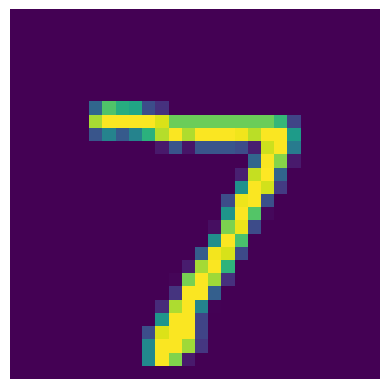

7


In [13]:
infer_mnist()

In [14]:
!seldon model unload mnist-pytorch

{}
